In [1]:
# Parameters
config = {
    "notebook": "notebooks/data_explorer.ipynb",
    "data_path": "C:/Users/nico_/Desktop/ITBA/TFI/global fishing watch/dataset/purse_seines.csv",
    "output_label": "purse_seines",
}


In [2]:
# check if config exists
try:
    config
except NameError:
    config_exists = False
else:
    config_exists = True

# make config if it does not exist already (e.g. passed in by papermill)
if not(config_exists):
    # set up some config for the experiment run
    config = {
        "data_path" : "C:/Users/nico_/Desktop/ITBA/TFI/global fishing watch/dataset/trollers.csv",
    }
print(config)

{'notebook': 'notebooks/data_explorer.ipynb', 'data_path': 'C:/Users/nico_/Desktop/ITBA/TFI/global fishing watch/dataset/purse_seines.csv', 'output_label': 'purse_seines'}


In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

df = pd.read_csv(config['data_path'], header="infer", sep=",",error_bad_lines=False, engine ='python')
print(df.shape)
df.head()

(1545323, 10)


,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source
0,9.924005e+12,1.379601e+09,0.0,1414.178833,0.0,298.500000,8.861500,-79.668427,-1.0,false_positives
1,9.924005e+12,1.379602e+09,0.0,1414.178833,0.0,298.500000,8.861506,-79.668442,-1.0,false_positives
2,9.924005e+12,1.379604e+09,0.0,1414.178833,0.1,128.399994,8.861511,-79.668488,-1.0,false_positives
3,9.924005e+12,1.379605e+09,0.0,1414.178833,0.1,111.199997,8.861511,-79.668480,-1.0,false_positives
4,9.924005e+12,1.379608e+09,0.0,1414.178833,0.0,41.700001,8.861502,-79.668503,-1.0,false_positives


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545323 entries, 0 to 1545322
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   mmsi                 1545323 non-null  float64
 1   timestamp            1545323 non-null  float64
 2   distance_from_shore  1545323 non-null  float64
 3   distance_from_port   1545323 non-null  float64
 4   speed                1545316 non-null  float64
 5   course               1545316 non-null  float64
 6   lat                  1545323 non-null  float64
 7   lon                  1545323 non-null  float64
 8   is_fishing           1545323 non-null  float64
 9   source               1545323 non-null  object 
dtypes: float64(9), object(1)
memory usage: 117.9+ MB
None


In [5]:
df.describe()

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing
count,1.545323e+06,1.545323e+06,1.545323e+06,1.545323e+06,1.545316e+06,1.545316e+06,1.545323e+06,1.545323e+06,1.545323e+06
mean,8.788081e+13,1.431543e+09,2.301199e+05,3.420745e+05,5.119294e+00,1.905941e+02,1.390564e+01,1.472753e+01,-9.833250e-01
std,6.522389e+13,3.645865e+07,3.841463e+05,5.070968e+05,5.593512e+00,1.042562e+02,1.891573e+01,1.116258e+02,1.418592e-01
min,9.924005e+12,1.325378e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.922275e+01,-1.800000e+02,-1.000000e+00
25%,3.832297e+13,1.409017e+09,0.000000e+00,8.062060e+03,1.000000e-01,9.820000e+01,-4.091158e-01,-7.966909e+01,-1.000000e+00
50%,5.966517e+13,1.438458e+09,4.049592e+04,9.693059e+04,1.300000e+00,2.034000e+02,5.338995e+00,-1.897600e+00,-1.000000e+00
75%,1.583170e+14,1.462147e+09,2.866600e+05,4.934421e+05,1.120000e+01,2.791000e+02,3.510037e+01,1.410436e+02,-1.000000e+00
max,2.679667e+14,1.480032e+09,2.315626e+06,6.728604e+06,1.023000e+02,5.110000e+02,7.833025e+01,1.799934e+02,1.000000e+00


In [6]:
df["is_fishing"].value_counts()

-1.000000    1522474
 0.000000      19737
 1.000000       2740
 0.666667        155
 0.333333        117
 0.250000         76
 0.750000         24
Name: is_fishing, dtype: int64

<ipython-input-7-0d4f70fb7023>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


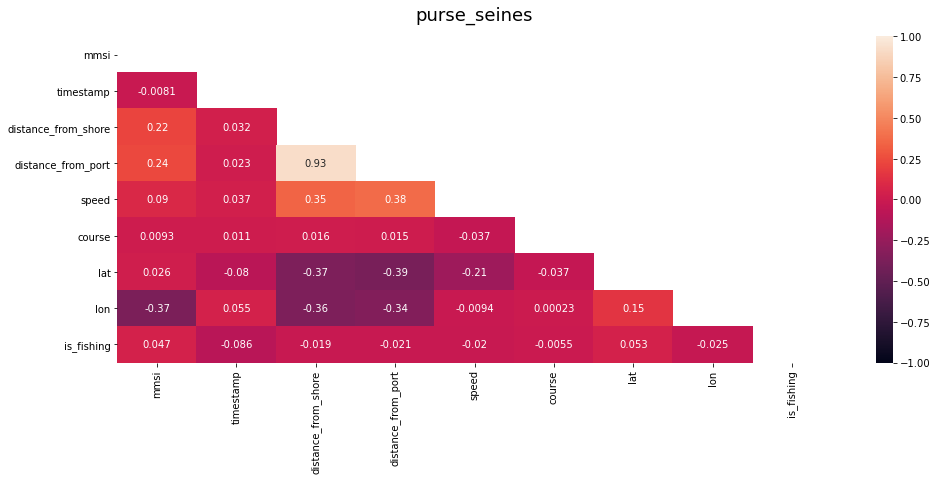

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
title = (config['data_path'].split('/')[-1]).split('.')[0]
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title(f'{title}', fontdict={'fontsize':18}, pad=16);

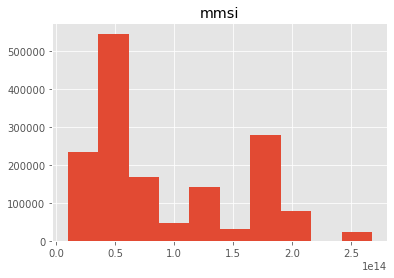

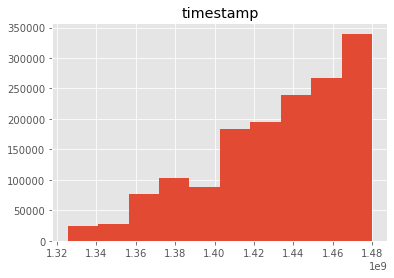

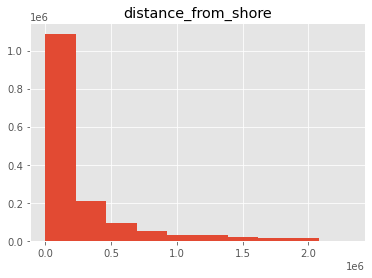

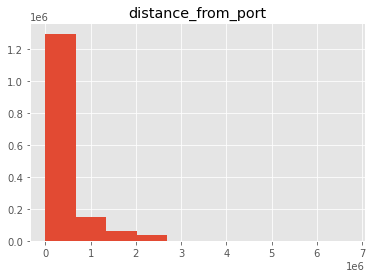

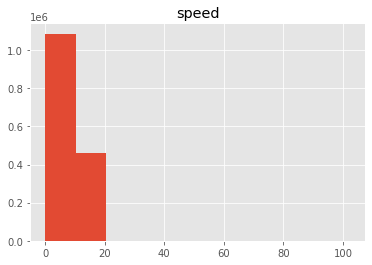

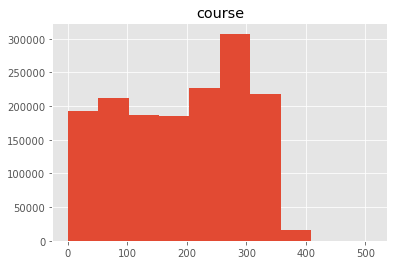

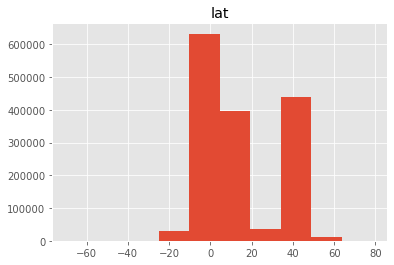

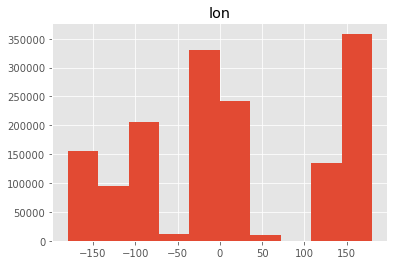

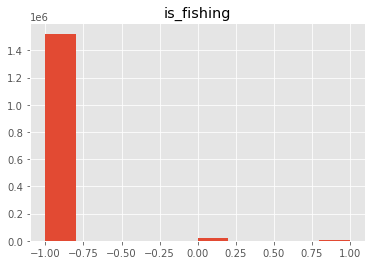

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline    
plt.style.use('ggplot')

for col in df._get_numeric_data().columns:
    ax = df[col].hist()
    ax.set_title(col)
    plt.show()


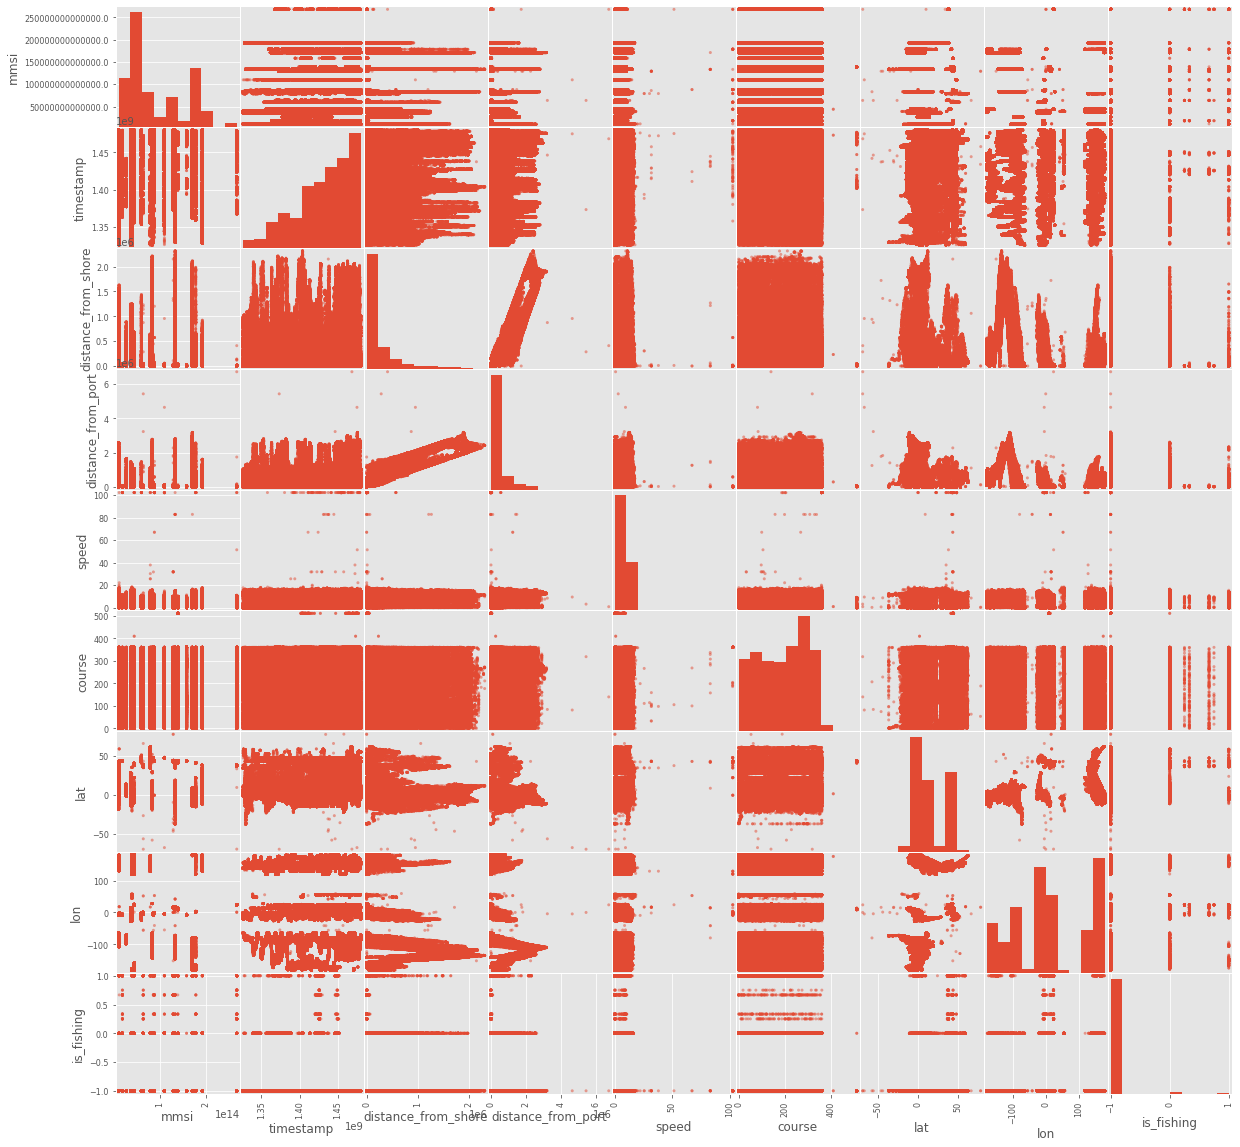

In [9]:
ax = pd.plotting.scatter_matrix(df._get_numeric_data(),figsize=(20,20))
plt.show()


In [10]:
df["is_fishing"].value_counts(normalize=True)

-1.000000    0.985214
 0.000000    0.012772
 1.000000    0.001773
 0.666667    0.000100
 0.333333    0.000076
 0.250000    0.000049
 0.750000    0.000016
Name: is_fishing, dtype: float64

¿Cual es el valor promedio de los buques que estan pescando?

In [11]:
df[df["is_fishing"] == 1].mean()

mmsi                   1.138622e+14
timestamp              1.422665e+09
distance_from_shore    7.294092e+04
distance_from_port     1.218750e+05
speed                  4.037226e+00
course                 1.839505e+02
lat                    3.652181e+01
lon                    1.177779e+01
is_fishing             1.000000e+00
dtype: float64

In [12]:
#Nos quedamos con los puntos que estan mayor a 3 millas nauticas de la costa.
df = df[(df['distance_from_shore'] >= 5556)]

#Nos quedamos solamente con los valores que estamos seguros que esta o no esta pescando.
df = df[(df['is_fishing'] == -1.0)  | (df['is_fishing'] == 1.0) ]

#Renombramos las columnas de la variable a predecir de si esta pescando o no.
df["is_fishing"] = np.where(df["is_fishing"] == 1.0, 'SI', 'NO')

Observamos la velocidad promedio separado por cuando esta o no esta pescando.

In [13]:
columns_to_show = ["speed"]

for column in columns_to_show:
    print('#########')
    print(df.groupby(["is_fishing"])[[column]].describe(percentiles=[]))


#########
               speed                                           
               count      mean       std  min   50%         max
is_fishing                                                     
NO          906311.0  7.785955  5.330390  0.0  10.1  102.300003
SI            1136.0  6.258539  4.824577  0.0   8.1   15.400000


In [14]:
df['mmsi'].value_counts().sort_index(ascending=False)

2.679667e+14      7294
1.928034e+14     59225
1.785557e+14      3514
1.781833e+14     45475
1.710880e+14    167500
1.583170e+14      1371
1.391359e+14     18567
1.335548e+14     22532
1.332927e+14     17576
1.291534e+14      4079
1.098996e+14     16214
8.806097e+13      1172
8.587357e+13     29577
8.317103e+13     42611
7.911140e+13     11115
6.371639e+13      5159
5.966517e+13      6866
4.400912e+13     14964
4.393595e+13     65193
3.900562e+13     65800
3.899211e+13       656
3.832297e+13    121570
3.621263e+13     67744
2.661604e+13     10242
1.819924e+13      1632
1.117001e+13      4475
1.088051e+13     70957
9.924005e+12     24367
Name: mmsi, dtype: int64

In [15]:
df.groupby('mmsi')['is_fishing'].value_counts(normalize=True).unstack().sort_values(by='mmsi', ascending=False)

is_fishing,NO,SI
mmsi,,
2.679667e+14,0.996573,0.003427
1.928034e+14,0.999747,0.000253
1.785557e+14,0.996870,0.003130
1.781833e+14,0.999538,0.000462
1.710880e+14,0.999051,0.000949
1.583170e+14,1.000000,NaN
1.391359e+14,0.998169,0.001831
1.335548e+14,1.000000,NaN
1.332927e+14,0.977924,0.022076
